## Question 2

This section of our research is devolved to the following research question:   
`How do movie genre preferences differ between countries in conflict or those experiencing similar global events?`   
in which we investigate variations in genre trends across nations, focusing on contrasts during political tensions and on how different nations respond to similar historical events.

### Imports

In [1]:
from src.utils.utils_movie import *
from src.utils.utils_wars import *
from src.utils.interactive_plots import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = load_data_movies(movies_path_base)
wars = load_data_wars(wars_path_base)

In [3]:
movies.head()

Movie_ID IMDb_Index                     Title            Original_Title  \
0    975900  tt0228333            Ghosts of Mars            Ghosts of Mars   
1    261236  tt0083949         A Woman in Flames       Die flambierte Frau   
2    171005  tt0097499                   Henry V                   Henry V   
3     77856  tt0058331              Mary Poppins              Mary Poppins   
4  32456683  tt0061637  Die Fahne von Kriwoj Rog  Die Fahne von Kriwoj Rog   

  Release_Date  Year                                             Genres  \
0   2001-08-24  2001  [Thriller, Science Fiction, Horror, Adventure,...   
1         1983  1983                                            [Drama]   
2   1989-11-08  1989  [Costume drama, War film, Epic, Period piece, ...   
3   1964-08-27  1964  [ChildrensFamily, Musical, Fantasy, Comedy, Dr...   
4         1967  1967                                                 []   

                   Genres_IMDb  Rating   Votes      Revenue  Length  \
0     [Action, Horror, Sci-Fi]     4.9   58872   14010832.0    98.0   
1                      [Drama]     5.9     648          NaN   106.0   
2  [Biography, Drama, History]     7.5   32088   10161099.0   137.0   
3    [Comedy, Family, Fantasy]     7.8  189202  102272727.0   139.0   
4                      [Drama]     7.7      24          NaN   108.0   

              Languages                     Countries  \
0  ['English Language']    [United States of America]   
1   ['German Language']                     [Germany]   
2  ['English Language']              [United Kingdom]   
3  ['English Language']    [United States of America]   
4   ['German Language']  [German Democratic Republic]   

                                             summary  
0  Set in the second half of the 22nd century, th...  
1  Eva, an upper class housewife, becomes frustra...  
2  {{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...  
3  The film opens with Mary Poppins  perched in a...  
4  Otto Brosowski, a communist miner, writes to t...

In [4]:
wars.drop(columns=["BatDeath", "Outcome"], inplace=True)
wars.head()

StateName  Side  StartYear  EndYear  WhereFought  \
WarName                                                                     
Second Sino-Japanese         Japan     1       1931     1933            7   
Second Sino-Japanese         China     2       1931     1933            7   
Chaco                      Bolivia     2       1932     1935            1   
Chaco                     Paraguay     1       1932     1935            1   
Saudi-Yemeni          Saudi Arabia     1       1934     1934            6   

                      Movies  
WarName                       
Second Sino-Japanese     931  
Second Sino-Japanese     931  
Chaco                   1198  
Chaco                   1198  
Saudi-Yemeni             806

In [5]:
conflicts_to_check = []
war_names = list(set(sorted(wars.index)))
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war = find_movies_year(movies, start_year, end_year)
    movies_war_1 = find_movies_side(movies_war, side_1)
    movies_war_2 = find_movies_side(movies_war, side_2)
    if movies_war_1 is not None and movies_war_2 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

First Kashmir
Second Kashmir
World War II
Turco-Cypriot
Iran-Iraq
War for Kosovo
Chaco
Russo-Finnish
Falkland Islands
Sinai War
Cold War
Invasion of Afghanistan
Sino-Vietnamese Border War
Arab-Israeli
IfniWar
Korean
Kargil War
Bangladesh
Second Laotian, Phase 2
Cenepa Valley
Communist Coalition
Second Sino-Japanese
Vietnamese-Cambodian
Football War
Second Ogaden War, Phase 2
Conquest of Ethiopia
Six Day War
War over Angola
Gaza-Israel conflict
Taiwan Straits
Franco-Thai
Badme Border
Soviet Invasion of Hungary
Ugandian-Tanzanian
Assam
Saudi-Yemeni
Nomonhan
Russo-Georgian War
War over the Aouzou Strip
Third Sino-Japanese
Changkufeng
Sino-Vietnamese Punitive
Off-shore Islands
Vietnam War, Phase 2
Invasion of Iraq
War over Lebanon
First Libyan Civil War
War of Attrition
Yom Kippur War
Bosnian Independence
Azeri-Armenian
Heglig Crisis
Gulf War
The conflicts to check are ['World War II', 'Sinai War', 'Cold War', 'Sino-Vietnamese Border War', 'Korean', 'Kargil War', 'Second Laotian, Phase 2',

Out of the list of conflicts obtained this way, we will focus our analysis on a subset of them, made of the ones with the highest historical importance and the highest amount of data in the dataset.   
The 4 conflicts we will focus on will be `Cold War`, `Korean War`, `Vietnam War` and `World War II`.

### Geographical Illustration

In this section we give a quick overview of the analyzed conflicts, by showing for each country a world map showing the countries on each side of the conflict. This distinction between `Side 1` (Red) and `Side 2` (Blue) will be important for a deeper understanding of the following sections.

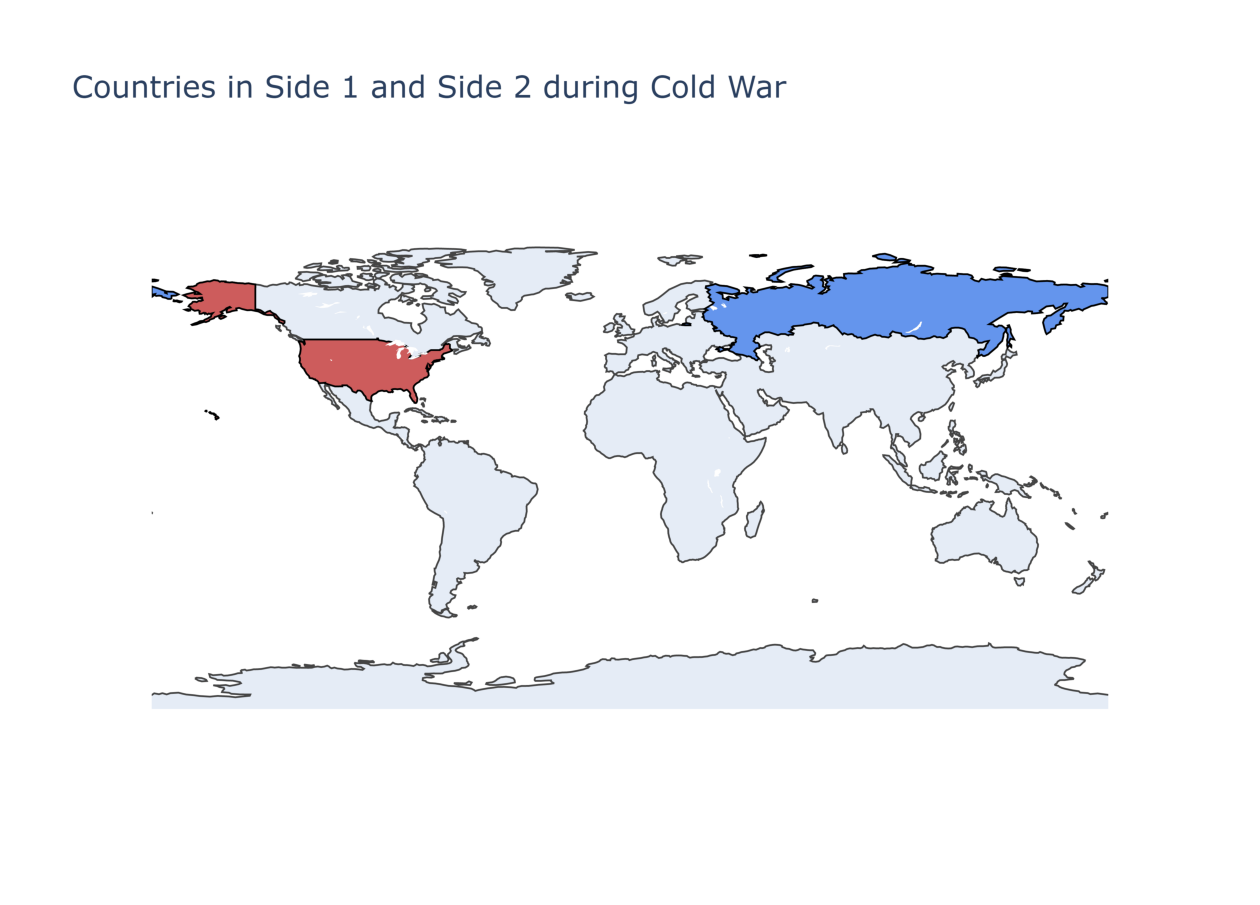

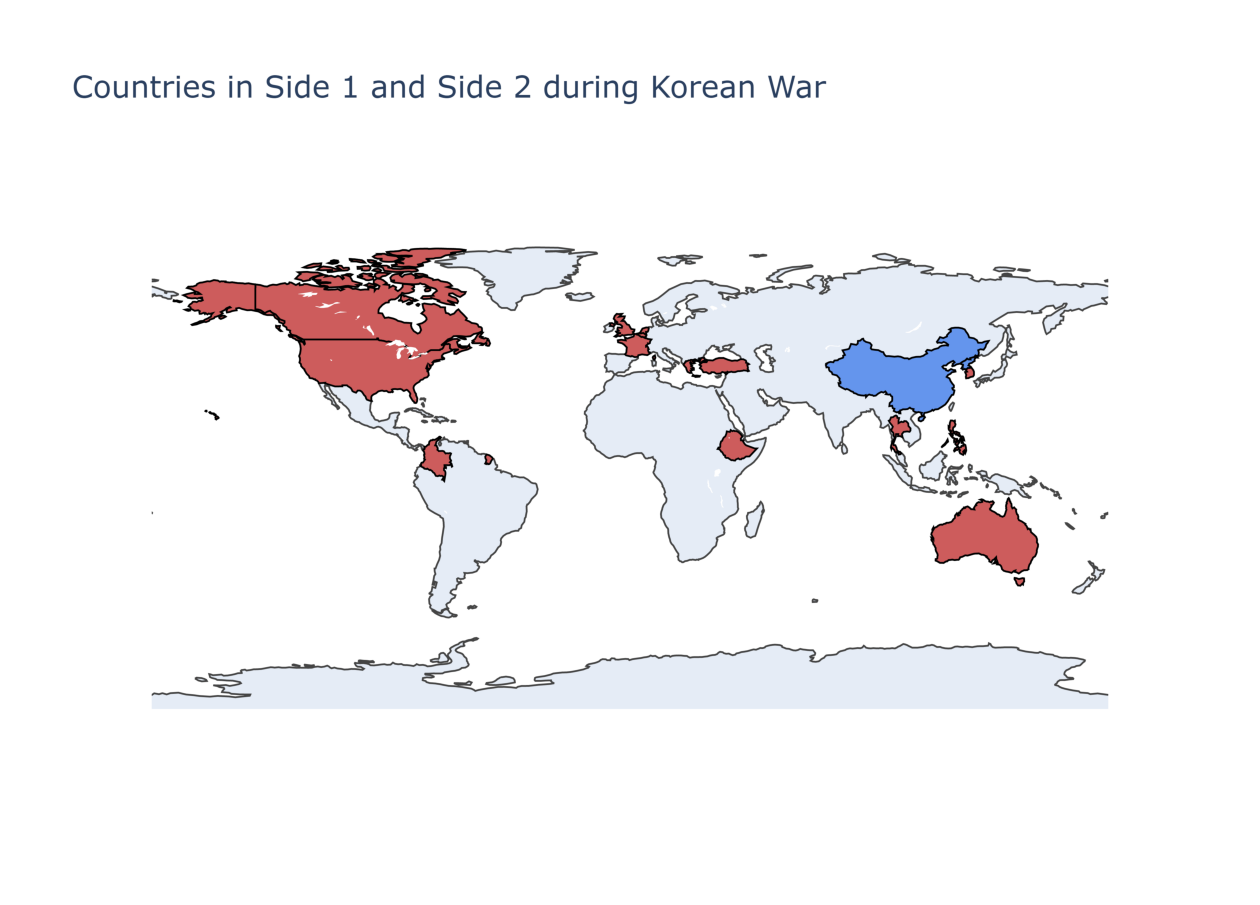

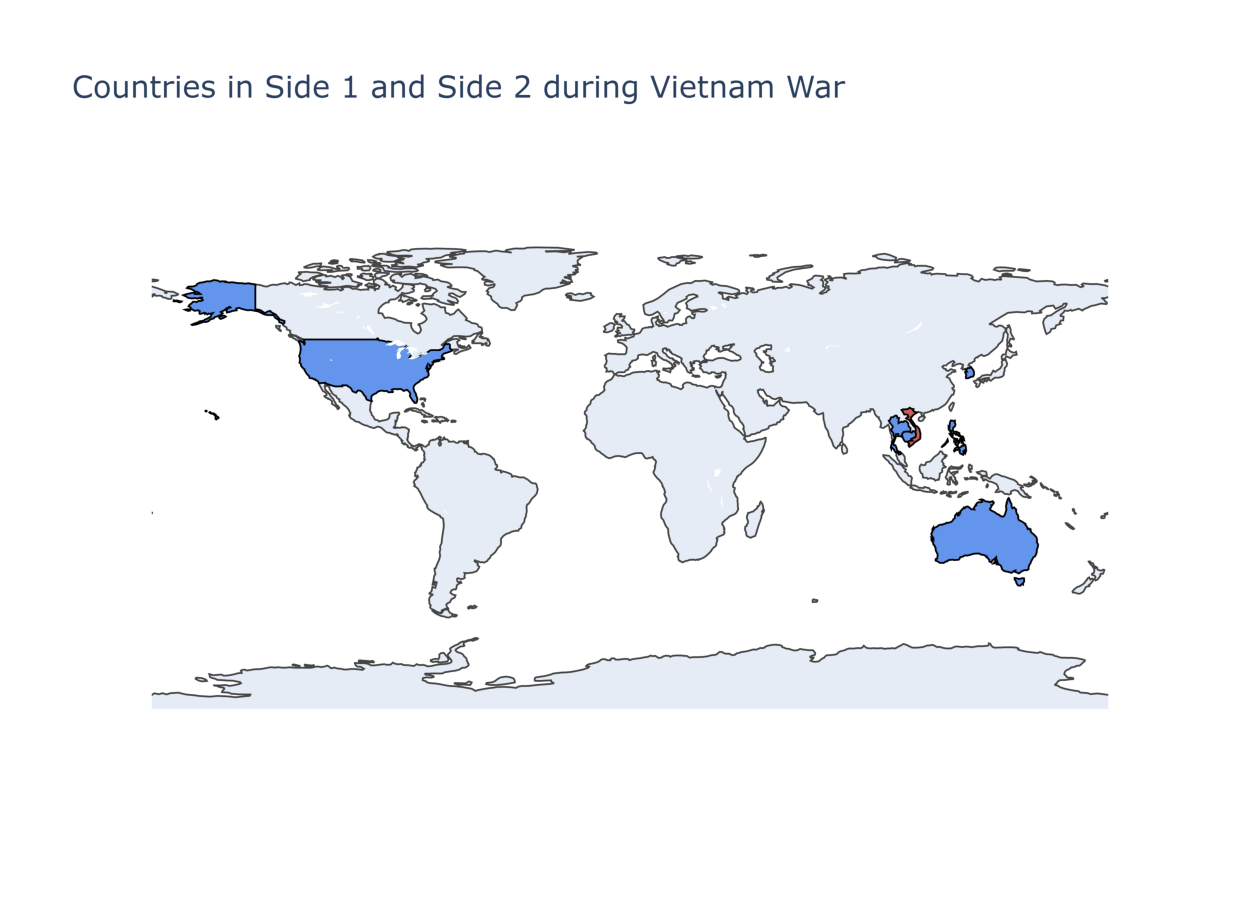

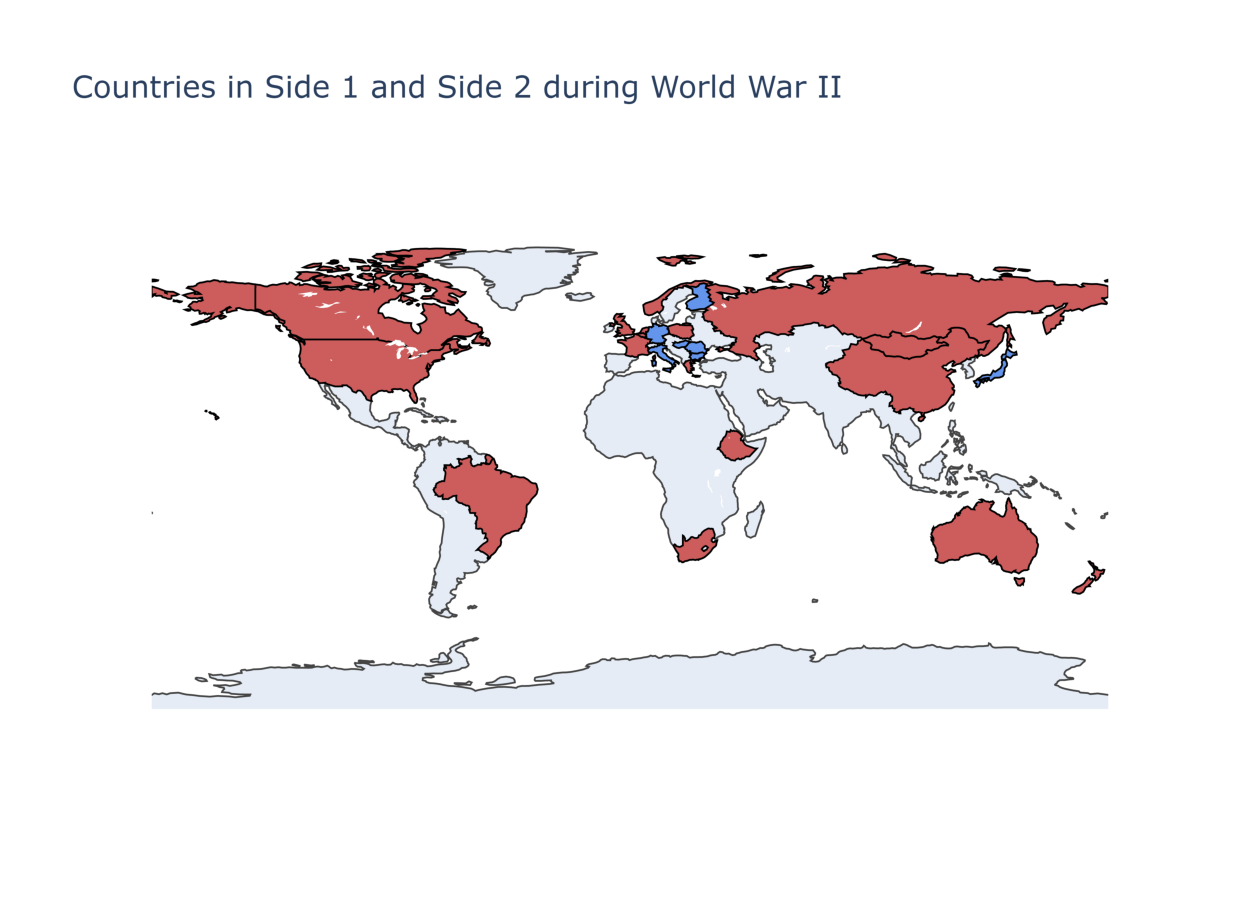

In [6]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    side_1, side_2 = find_sides(wars[wars.index==war])
    plot_countries(side_1, side_2, war)

### Timeline Illustration

Another plot helpful in the understanding of the setting of the analysis is the following timeline, which aims to show the number of movies produced over the course of the years relative to each one of the considered conflicts. To obtain the plot, we filter the dataset based on the `summary` column, looking for the name of the conflict (or abbreviations, such as WW2):

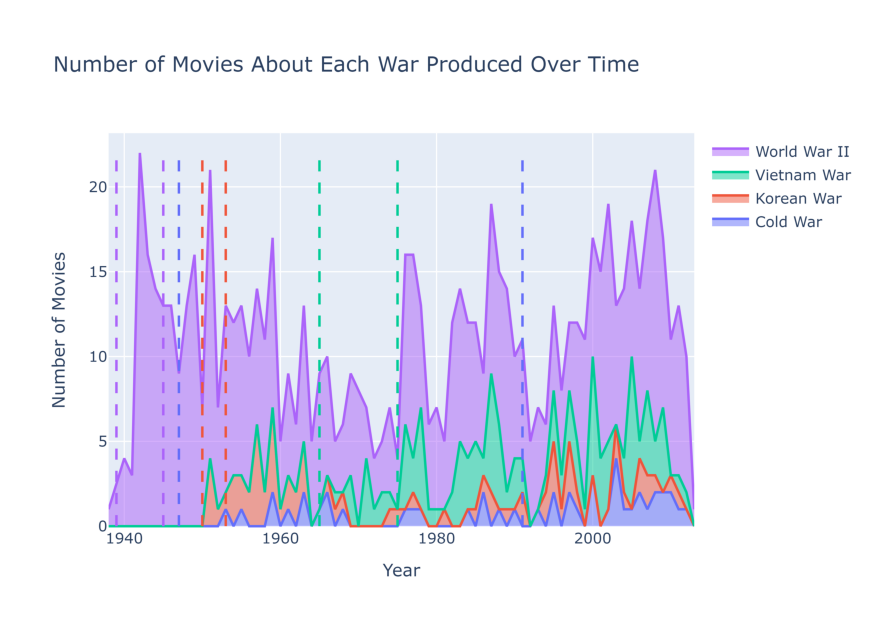

In [7]:
plot_movies_timeline(wars, movies, war_names_r, True)

The plot shows a large area associated to movies related to `World War II`, much larger than that of all other conflicts combined. This highlights the influence a conflict of such scale has had on the world even further in the future.   
A more in-depth inspection of the graph shows how, despite the general movies trend are characterized by an overall increase in movies produced every year, the peak in production of WWII movies has peaked during the conflict itself, to then decrease gradually over time to then settle between 10-15 movies a year in the XXI century.   
Movies on the `Vietnam War` were not produced inconsistently across all years starting from the war, reaching their peak in 2005 with 9 movies.   
The `Korean War` has had its highest movies production in the period right after the war, in the 1950s, after which it hasn-t received much attention in the cinematographic world, achieving at most 3 movies per year ever since.   
Finally, contrary to our expectations, the `Cold War` itself didn't get much attention during the course of the years, with no more than 4 movies produced in a given year making it the lowest in our analysis.

### Quantitative Analysis

The final introductive plot of this section is a sunburst chart which depicts for each war where the movies obtained by the previous filtering are produced, using the same division between `Side 1` and `Side 2` as in the section for `Geographical Illustration`.   
This section is mainly aimed at depicting a comparison between the way the opposing countries in the war (as well as the ones not directly involved) were influenced by the conflicts, in terms of a purely quantitative rather than qualitative analysis.   
For each of the following plots, the `Red` section corresponds to `Side 1`, the `Blue` one to `Side 2` and the `Green` one to movies produced in `other countries`.

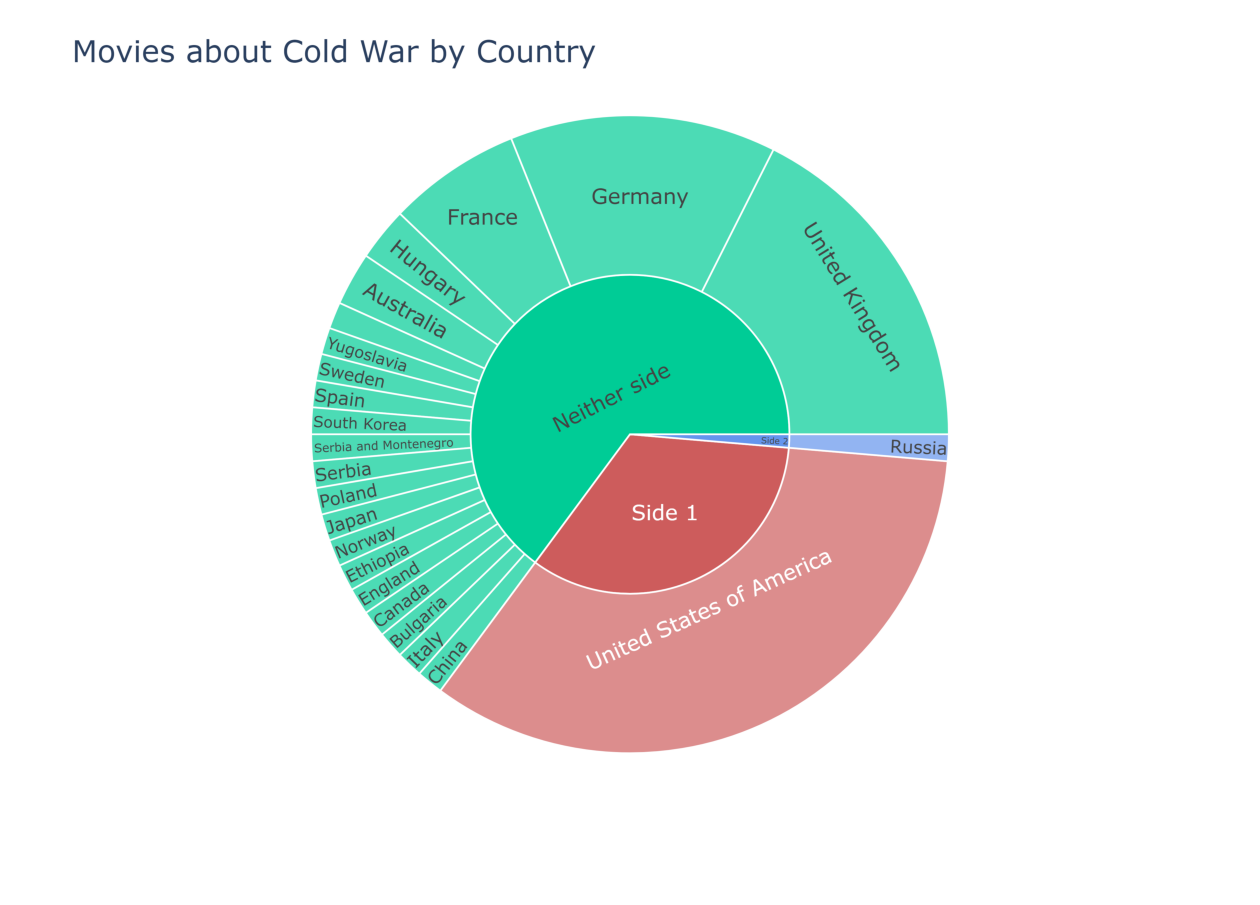

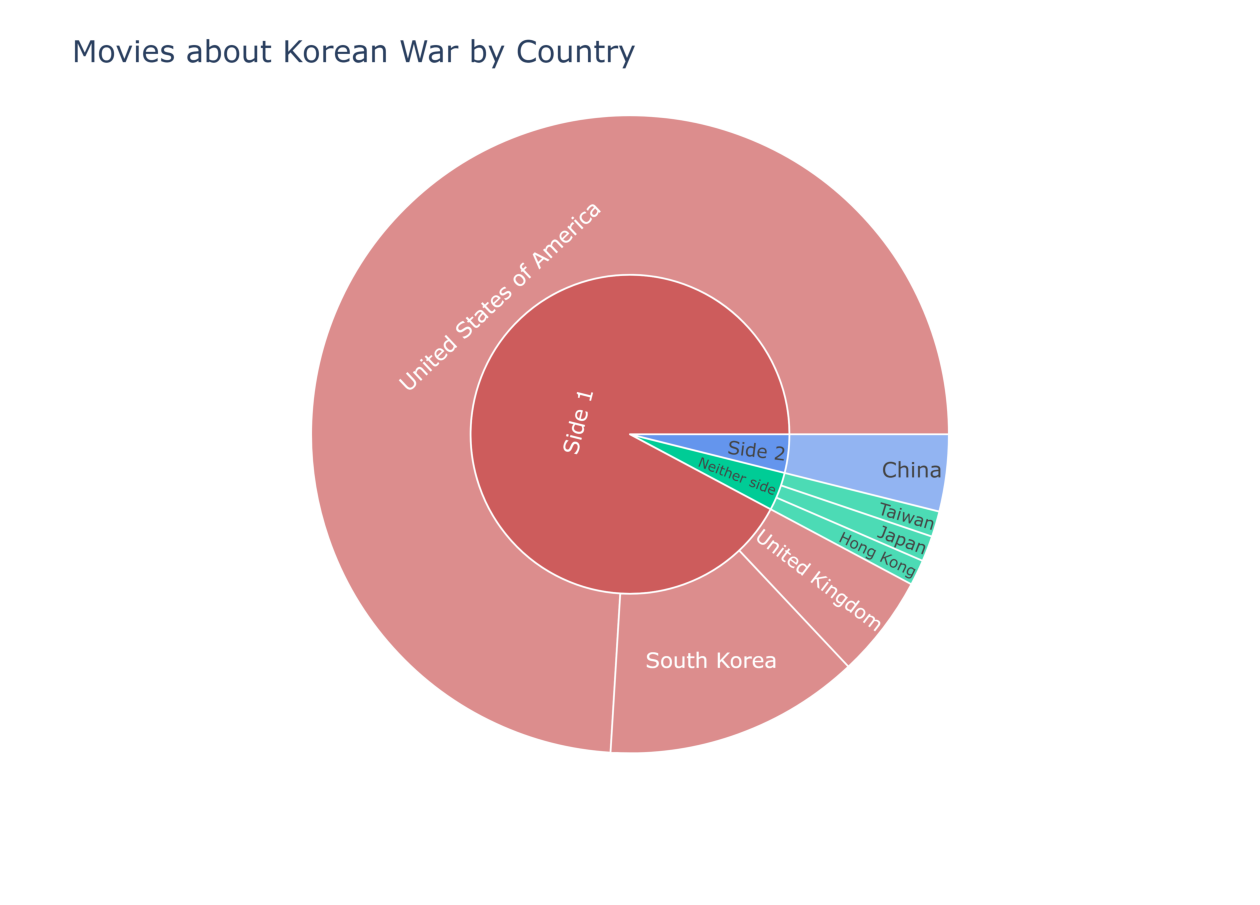

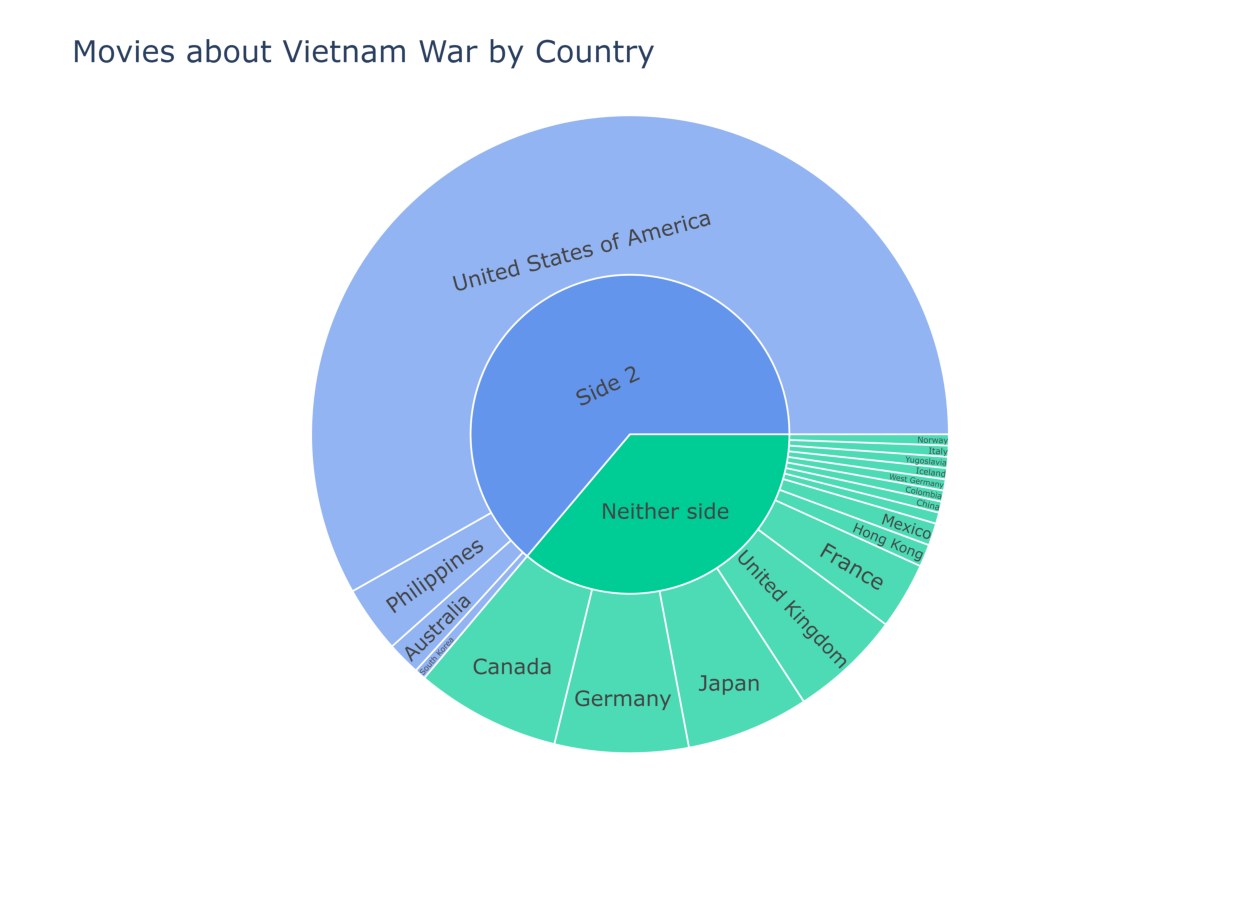

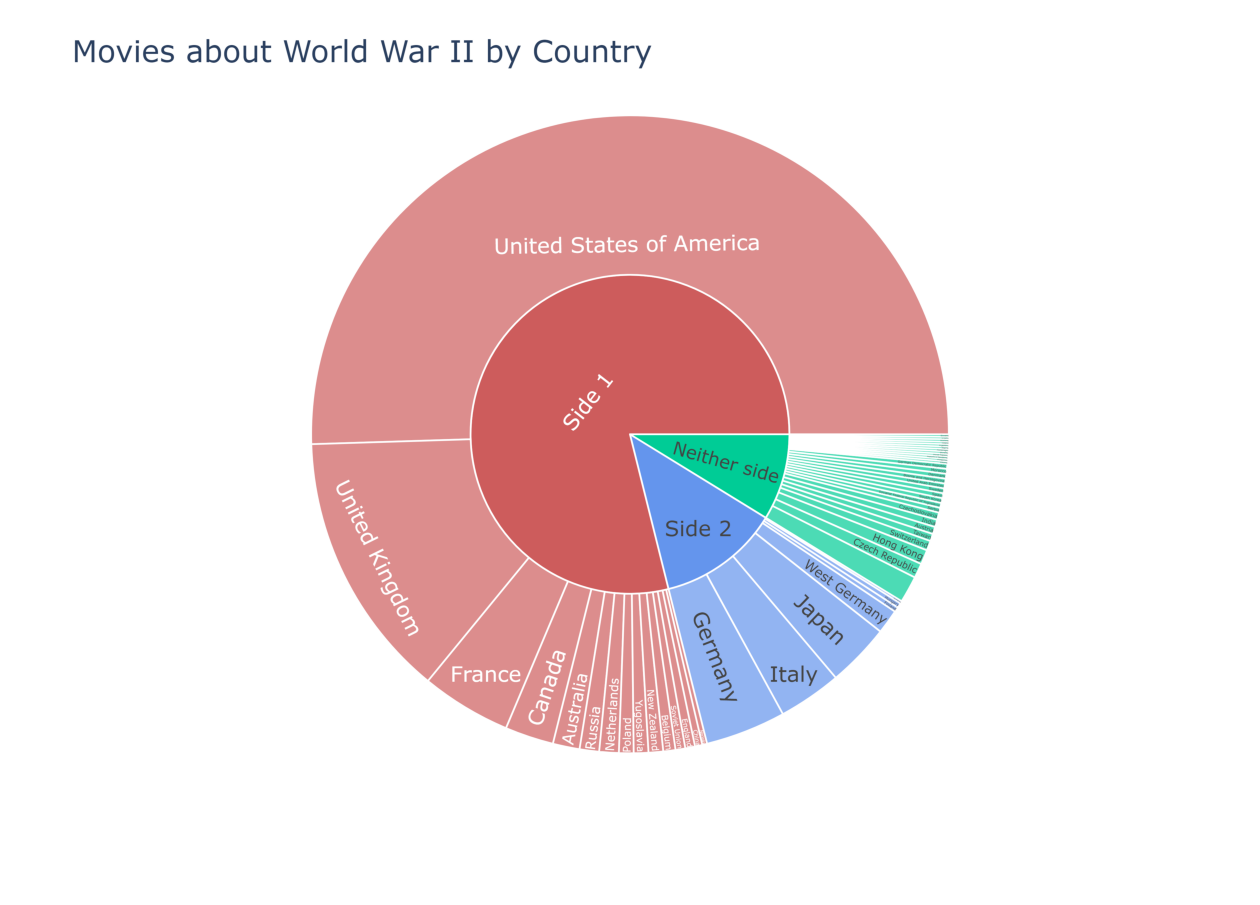

In [8]:
for war in war_names_r:
    plot_country_piechart(wars, movies, war)

A comment which can be made for each of these graphs is that United States take up the largest slice of the chart divided by countries, and this is largely due to the fact that the United States contribute in the largest amount to all movies produced, regardless of the topic.   

Entering more in detail, we see that for the `Cold War` the largest part of the movies were produced by countries not directly involved in the conflict, showing how such a conflict has impacted the whole world and not only the two opposing sides. As stated before, the USA contribute to the largest part of the movies, while Russia, despite being one of the two involved countries, only amounts to a single movie in our chart, surpassed by the large european countries such as Germany, UK and France.

Once again, for the `Korean War`, most of the movies were produced by the USA, but if we exclude its contribution we can see that South Korea, one of the countries directly involved in the conflict, is the largest producer of movies on the conflict. Follow the UK and China, alongside some other Asian countries.

For the `Vietnam War` we can see from the chart that no movies about it were released in Vietnam, only country directly involved in the war as "Side 2" in our dataset, while the movies are almost equally distributed among the various countries (as usual, exception made for the USA).

Finally, regarding `World War II`, we can see that the largest forces of the conflict lead the movie production, with the USA having released more than 400 movies, the UK more than 100 and countries such as France, Germany, Italy and Japan all with more than 20 movies each.
On top of this, the massive influence of the conflict can also be seen from the large number of smaller countries having released some movies about it, with movies released in more than 50 countries in total!

### Movie Genres by Depicted Country

In this and the following sections we delve deeper in the qualitative analysis and comparison between the two sides of the conflicts, analyzing the different distribution in movie genres for different subsets of the Movies dataset.   
Here we provide a first analysis by filtering our dataset based on the movies released in a historical period around each of the analyzed war, and check what is the movie genre of the movies depicting countries from either side of the conflict.   
To do this we first filter the dataset for movies released in a period of time of 2 years around the conflict by looking at the `Year` column, after which we filter the dataset once again based on the `Summary` column, but this time we look for movies mentioning the countries on either side (an alternative approach would be to look for movies released in such countries in this same timeframe, but this ends up reducing the dataset size too much and not providing enough data for any result).   
We plot our results in two barplots, one for each side of the war, each one showing not only the genre distribution for that period of time but also the genre distribution over the whole dataset, to provide through comparison additional information about the way this sentiment changed overtime.   

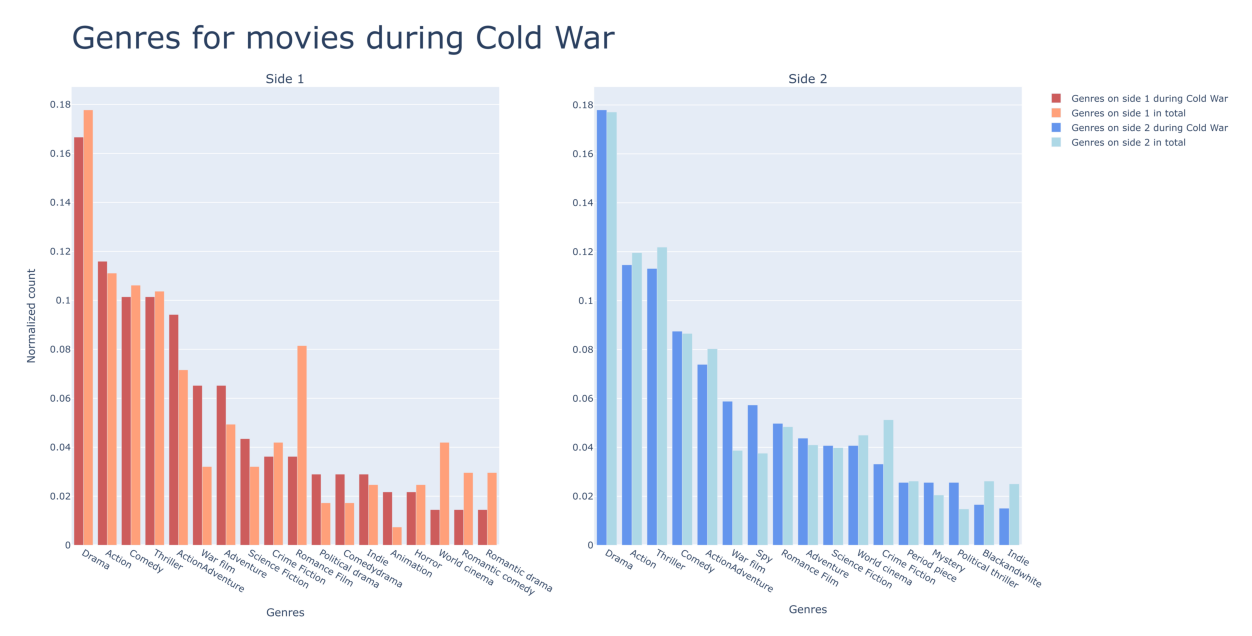

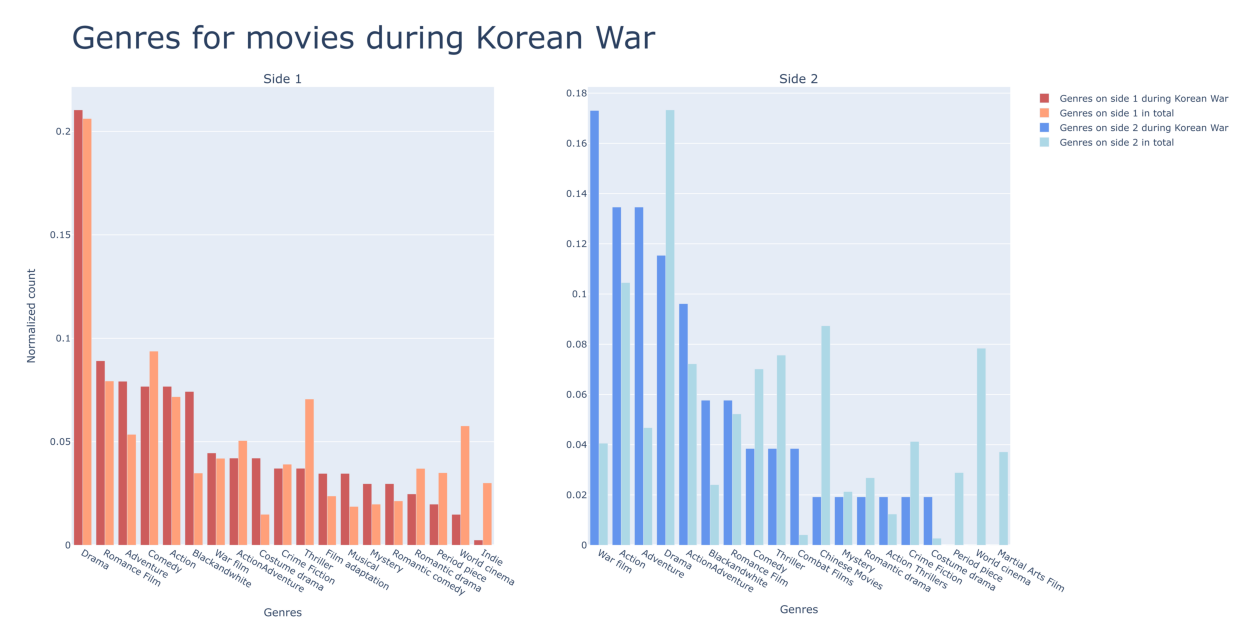

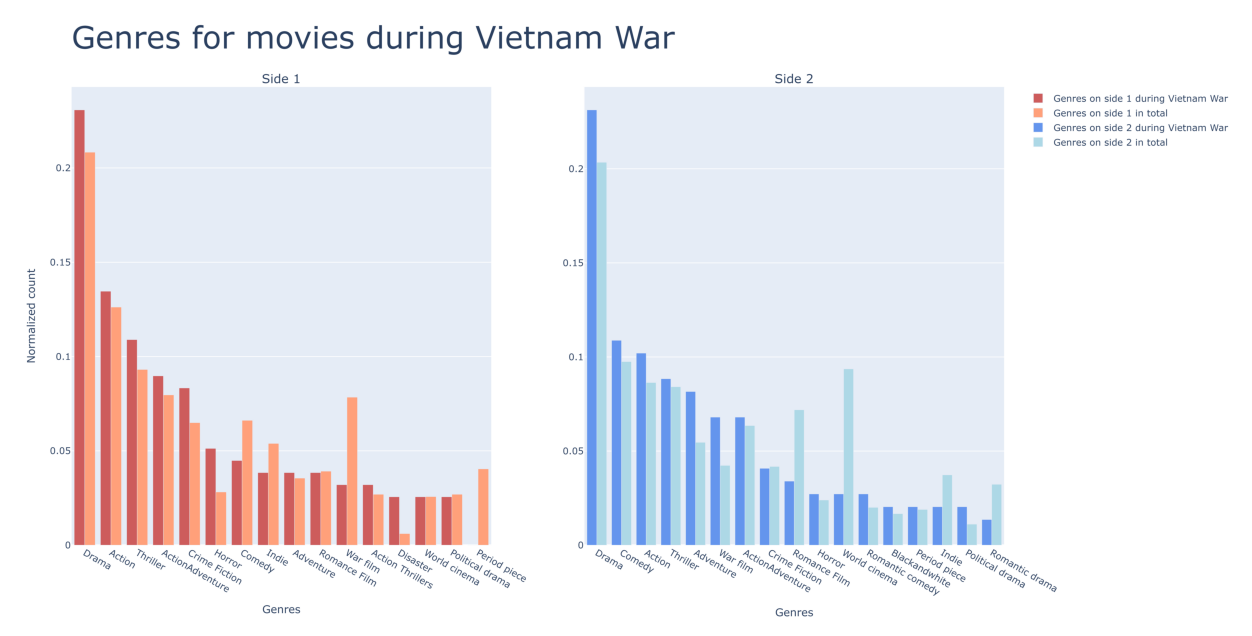

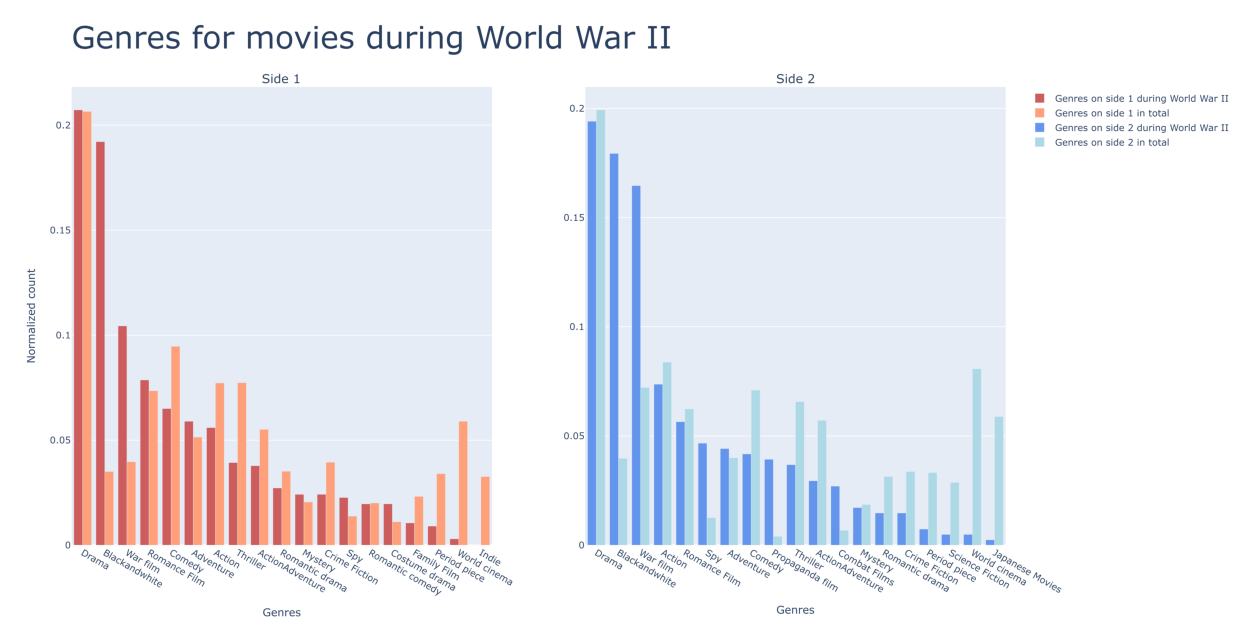

In [9]:
for war in war_names_r:
    plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="summary"))
    # plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="country"))

A first look at the plot makes it easy to see that genres like `Drama` are the most common overall, wo we will not consider these common trends in the analysis, but we will focus more on the distinctions between the two sides and between the specific time period vs the entire dataset.

During the `Cold War`, on Side 1 genres like Adventure, ActionAdventure, and War Films show a significant increase compared to the whole dataset, while genres related to romance are less common in this period of time. On Side 2, instead, Spy films and War films stood out more, alongside Political Thrillers, suggesting themes of espionage and historical reflection, themes fairly common in the sentiment of the time. 

During the `Korean War`, a common trend between the two sides was the large presence of BlackandWhite movies, which is mainly to attribute to an historical reason rather than a Geopolitical one. On Side 1, there was a strong emphasis on Romance Films and Adventure films, while Side 2 leaned more into violent themes, such as War Films (which are the most present in this reduced dataset) and Combat Films, highlighting themes of conflict and cultural representation.

The `Vietnam War` era saw a general increase in genres like Action, Thriller, and War Films, emphasizing the conflict's intensity, but the specific response of the two sides was quite different: Side 1 had a much stronger increase in genres like Crime Fiction, Horror and Disaster compared to all other subsets of data analyzed so far, underlying the climate of tension in Vietnam in particular in this period of time. Side 2, on the other hand, had changes more in line with the general trends, with Action, Adventure and War films being more present while Romance and World cinema are less common overall.

Finally, during `World War II`, we see once again the trend for  BlackandWhite films dominating the genre landscape on both sides compared to the overall dataset, once again associated to the analyzed historical period. What characeterizes this period the most is the sharp increase in War Films, which see by far the largest increase, with Spy movies being also fairly common on both sides. On top of this, genres like Adventure and Romance Films were still prominent, reflecting themes of heroism and human struggle. 
The most distinctive trend betwee the two sides is the presence of Propaganda Films on Side 2, alongside genres like Japanese Movies which are instead causes by a purely geographical connotation.

### Movie Genres by Country of Production

This final section of the comparative analysis between countries focuses more on the way the conflict is portrayed in movies produced in different countries. This section applies the same filtering as the one on `Quantitative Analysis`, but goes in depth analyzing the differences in genre between the two movie subsets, although this analysis often times ended up being difficult due to the limited sizes of the sub-datasets.

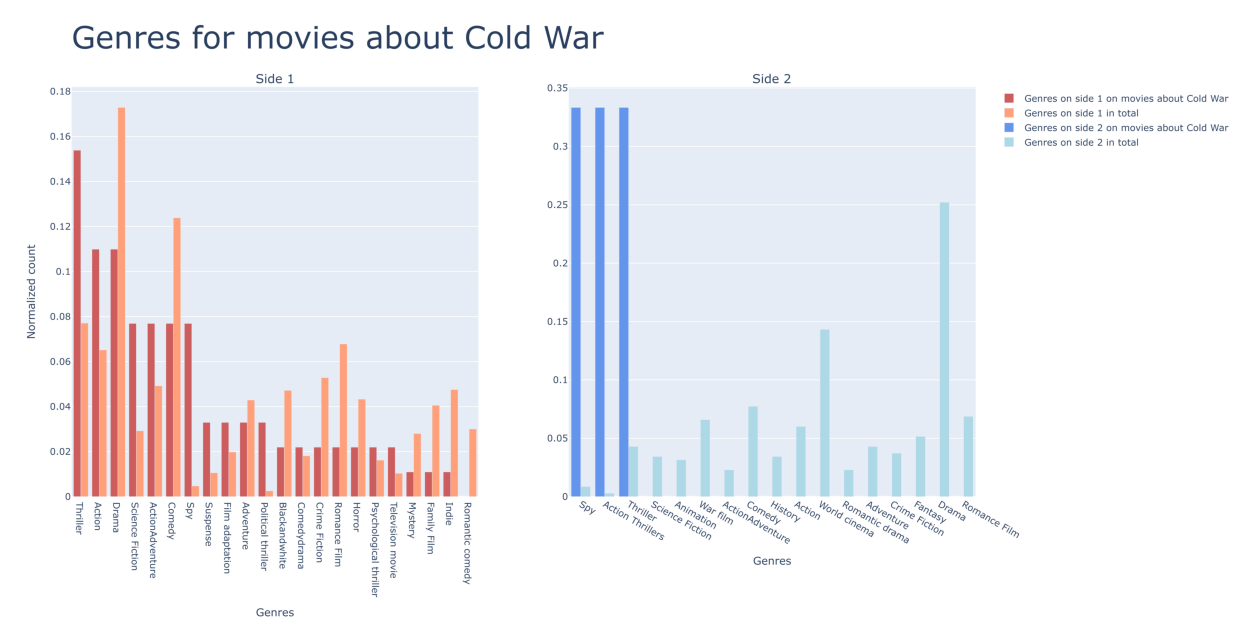

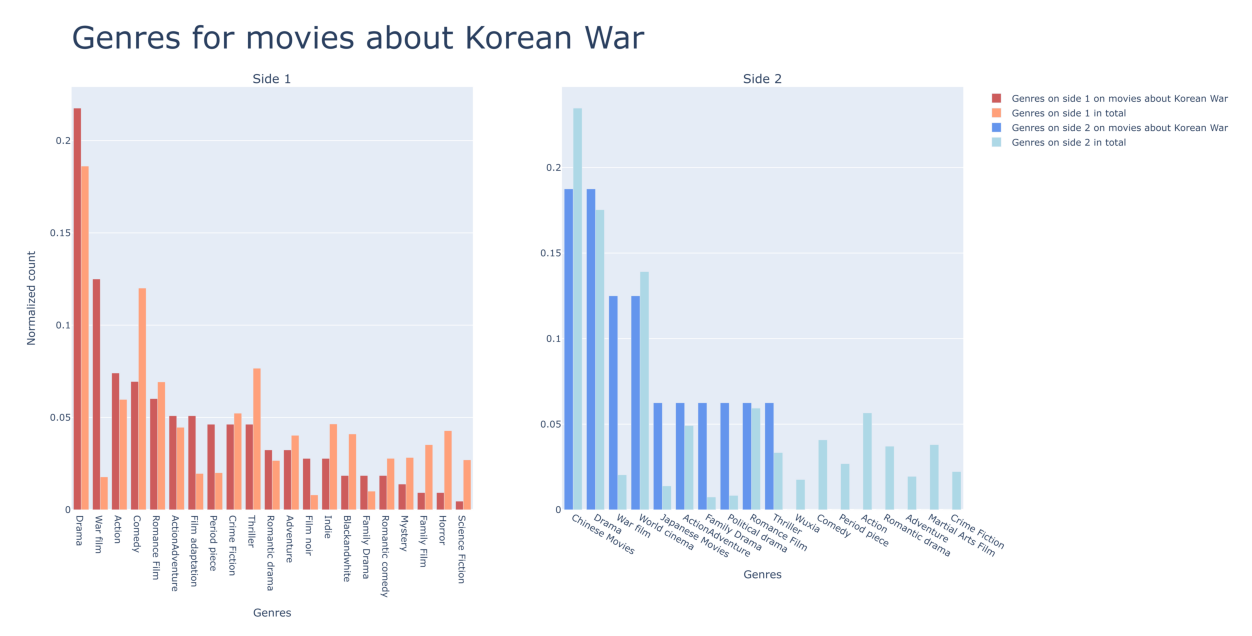

Not Enough Data


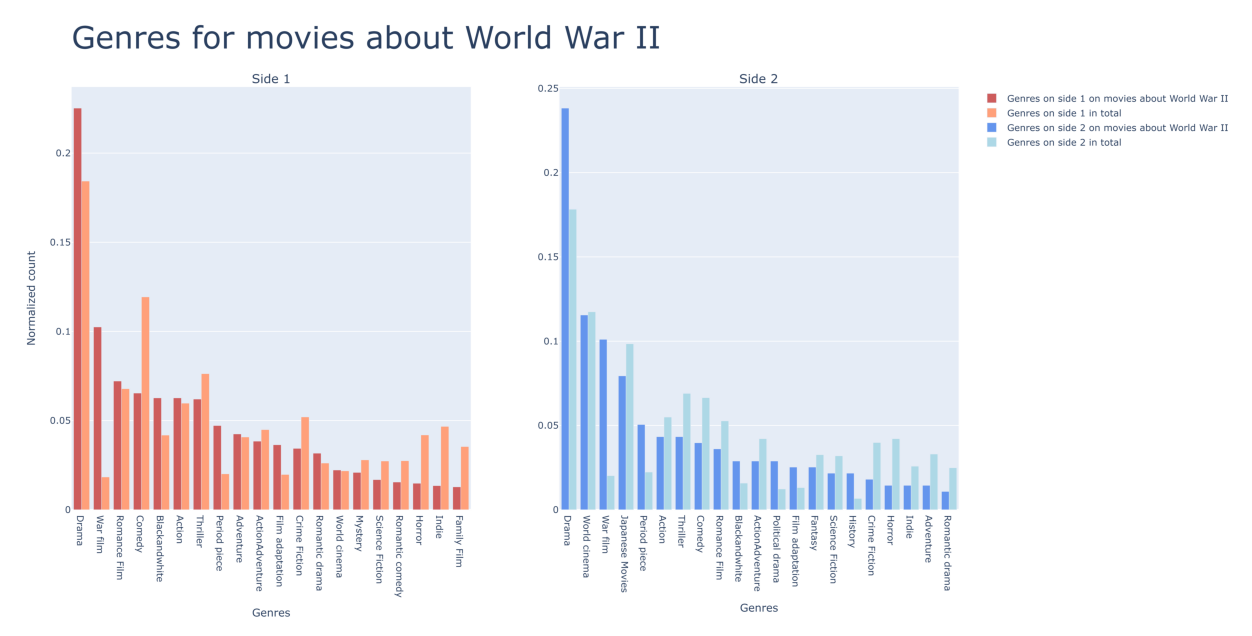

In [10]:
for war in war_names_r:
    plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="country"))
    # plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="summary"))

As stated in the introduction to this section, the fisrt thing  to notice is the fact that for both `Cold War` and `Korean War` one side has much fewer movies compared to the other, while for the `Vietnam War` not enough movies were found for one of the two sides, hence no plot was produced. This leads to a the results relative to these plots less significant overall, but we decided to still mention them for completeness.

The plot for the `Cold War` shows lines of regular heigths in the histogram, due to the small amount of movies plotted. Other than this, the trends in the plot are to be expected, with genres like Thriller and Spy being the most represented in both sides, but a weird-to-explain entry is the presence of Comedy films on Side 1.   
Movies about the `Korean War` show much more different genres on Side 1, while on Side 2 we see a strong geographical component in the genres, with Chinese and Japanese Movies being common.   
Finally, movies about `World War II` are the ones associated with the largest number of movies, information which can also be extracted by the "smoothness" of the histogram distribution. Both sides share a large variety of genres for the movies, with War films and Period Piece being the most significant ones in terms of comparison with the whole dataset, but no significant difference between the two sides can be extracted from he plot.

In general this plots underline how the general sentiment associated to the movies produced during the war and movies which directly reference the war are usually quite serious and tense, so we decided to go more in depth with the analysis of the sentiment of the storytelling, suing techniques derived from Natural Language Processing (NLP).

## Question 3

While our previous analysis revealed distinct patterns in genre production across different countries, a deeper examination of narrative construction within the same genre warrants investigation. Specifically, this section explores how war films, despite sharing a common genre classification, exhibit significant variations in their storytelling approaches based on their country of origin.

Our analysis will focus exclusively on war cinema as it provides a unique window into how different nations process, interpret, and memorialize shared historical events through film. War movies are particularly revealing because they often reflect not only a country's historical perspective but also its contemporary values, national identity, and relationship with military conflict

#### Imports 

In [1]:
import pandas as pd
import numpy as np
from src.utils.sentiment_analysis import *
import plotly.express as px
import seaborn as sns
import warnings
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from ast import literal_eval
import plotly.graph_objects as go 
import plotly.io as pio
from IPython.display import Image
from plotly.subplots import make_subplots
import warnings
from scipy import stats
warnings.filterwarnings("ignore")

In [2]:
# Download necessary NLTK packages for text processing and sentiment analysis
nltk.download('punkt')  # Tokenizer for splitting text into words
nltk.download('averaged_perceptron_tagger')  # POS tagger for grammatical structure
nltk.download('maxent_ne_chunker')  # NER chunker for extracting named entities
nltk.download('words')  # Word corpus for NER
nltk.download('stopwords')  # Common words to exclude from analysis
nltk.download('wordnet')  # Lexical database for English
nltk.download('vader_lexicon')  # Lexicon for sentiment analysis
nltk.download('omw-1.4')

# Define the set of English stopwords to remove common words that don't add meaning
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wflaf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-

In [3]:
# Loading data 
df = pd.read_csv('data/movies_with_summaries.csv')
wars_df = pd.read_csv('data/wars_filtered_clean.csv')
lemmatizer = WordNetLemmatizer()

In [4]:
# Extracting sides
wwii_movies_side1, wwii_movies_side2, cold_war_movies_side1, cold_war_movies_side2, korean_war_movies_side1, korean_war_movies_side2, vietnam_war_movies_side1, vietnam_war_movies_side2 = extracting_side(wars_df, df)



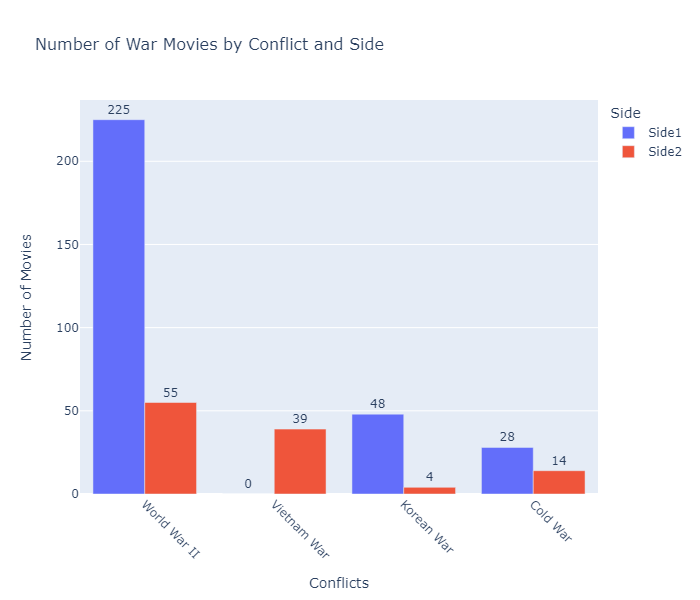

In [5]:

# Number of movies per sides

data = {
    'Wars': ['World War II', 'Vietnam War', 'Korean War', 'Cold War'],
    'Side1': [
        wwii_movies_side1.shape[0], 
        vietnam_war_movies_side1.shape[0], 
        korean_war_movies_side1.shape[0], 
        cold_war_movies_side1.shape[0]
    ],
    'Side2': [
        wwii_movies_side2.shape[0], 
        vietnam_war_movies_side2.shape[0], 
        korean_war_movies_side2.shape[0], 
        cold_war_movies_side2.shape[0]
    ]
}

df_visual = pd.DataFrame(data)

# Melt the dataframe for a grouped bar chart
df_melted = df_visual.melt(id_vars="Wars", var_name="Side", value_name="Number of Movies")

# Create the interactive bar chart with plotly express
fig = px.bar(
    df_melted, 
    x="Wars", 
    y="Number of Movies", 
    color="Side", 
    barmode="group",
    text="Number of Movies",
    title="Number of War Movies by Conflict and Side"
)

fig.update_layout(
    xaxis_title="Conflicts",
    yaxis_title="Number of Movies",
    title_font_size=16,
    xaxis_tickangle=45,
    legend_title="Side",
    font=dict(size=12),
    height=600
)


fig.update_traces(textposition="outside")
fig.write_html("number_of_war_movies.html")
fig.write_image("number_of_war_movies.png")
Image('number_of_war_movies.png')


Given the limited number of movies produced about the Vietnam War and the Korean War, we have decided to focus exclusively on the Cold War and World War II.

# Sentiment Analysis

We will perform a sentiment analysis on the summaries of movies identified. To achieve this, we will use the NLTK (Natural Language Toolkit) library. This analysis will help identify the emotional tone of the summaries, determining whether they are primarily positive, negative, or neutral depending of the countries of production.


In [6]:
## Preprocess the summaries: tokenize and clean the text and Remove stopwords

processed_docs_1 = preprocess_summaries(wwii_movies_side1, stop_words, column_name="summary")
processed_docs_2 = preprocess_summaries(wwii_movies_side2, stop_words, column_name="summary")
processed_docs_3 = preprocess_summaries(cold_war_movies_side1, stop_words, column_name="summary")
processed_docs_4 = preprocess_summaries(cold_war_movies_side2, stop_words, column_name="summary")

In [7]:
## Conduct the Sentiment Analysis

sentiment_df_1=conduct_sentiment_analysis(processed_docs_1, wwii_movies_side1)
sentiment_df_2=conduct_sentiment_analysis(processed_docs_2, wwii_movies_side2)
sentiment_df_3=conduct_sentiment_analysis(processed_docs_3, cold_war_movies_side1)
sentiment_df_4=conduct_sentiment_analysis(processed_docs_4, cold_war_movies_side2)

In [18]:
## Calculte the meand and the IC of the Sentiment Analysis

mean_scores_1 = sentiment_df_1.mean()
mean_scores_2 = sentiment_df_2.mean()
mean_scores_3 = sentiment_df_3.mean()
mean_scores_4 = sentiment_df_4.mean()

ci_wwii_side1 = calculate_confidence_intervals(sentiment_df_1)
ci_wwii_side2 = calculate_confidence_intervals(sentiment_df_2)
ci_cold_side1 = calculate_confidence_intervals(sentiment_df_3)
ci_cold_side2 = calculate_confidence_intervals(sentiment_df_4)



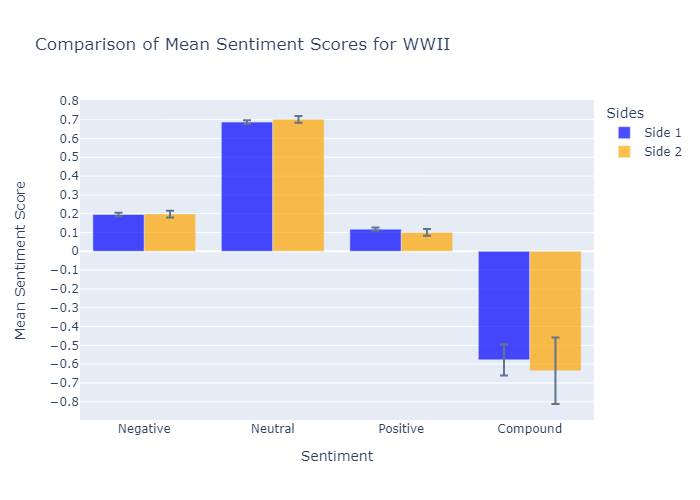

In [9]:
#WWII VISUALISATION

# Visualisation 1 : mean compearison
labels = ['Negative', 'Neutral', 'Positive', 'Compound']
x = np.arange(len(labels))

#Confiance Intervall

ci_lower_1 = mean_scores_1 - ci_wwii_side1['ci_lower'].values
ci_upper_1 = ci_wwii_side1['ci_upper'].values - mean_scores_1

ci_lower_2 = mean_scores_2 - ci_wwii_side2['ci_lower'].values
ci_upper_2 = ci_wwii_side2['ci_upper'].values - mean_scores_2


fig1 = go.Figure()
fig1.add_trace(go.Bar(
    x=labels,
    y=mean_scores_1,
    name='Side 1',
    error_y=dict(
        type='data',
        symmetric=False,
        array=ci_upper_1,
        arrayminus=ci_lower_1
    ),
    marker_color='blue',
    opacity=0.7
))
fig1.add_trace(go.Bar(
    x=labels,
    y=mean_scores_2,
    name='Side 2',
    error_y=dict(
        type='data',
        symmetric=False,
        array=ci_upper_2,
        arrayminus=ci_lower_2
    ),
    marker_color='orange',
    opacity=0.7
))

fig1.update_layout(
    title="Comparison of Mean Sentiment Scores for WWII",
    xaxis_title="Sentiment",
    yaxis_title="Mean Sentiment Score",
    barmode='group',
    legend_title="Sides", 
    height = 500,
    autosize=True,
    yaxis=dict(
        tick0=0,
        dtick=0.1, 
        scaleratio=2
    )
)

fig1.write_html("wwii_sentiment_mini.html")
fig1.write_image("wwii_sentiment_mini.png")
Image('wwii_sentiment_mini.png')

We do observe a higher negative score which isn't surprizing, however the overlapping confidence intervals across all categories indicate that the differences between the Allied and Axis films' sentiment scores are likely not statistically significant. However, it is surpriing to observe that the confidence intervall is much higher for the compound result. Let's observe the distribution. 

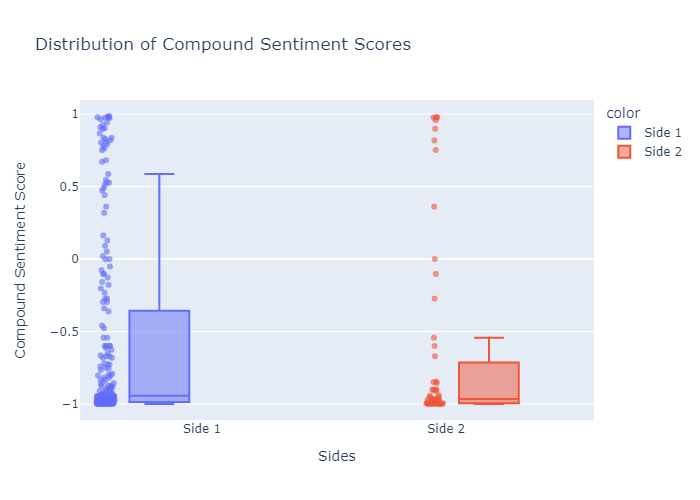

In [10]:
# Visualisation 2 : Distribution of Compound Sentiment Scores
fig2 = px.box(
    x=['Side 1'] * len(sentiment_df_1['compound']) + ['Side 2'] * len(sentiment_df_2['compound']),
    y=np.concatenate([sentiment_df_1['compound'], sentiment_df_2['compound']]),
    labels={"x": "Sides", "y": "Compound Sentiment Score"},
    color=['Side 1'] * len(sentiment_df_1['compound']) + ['Side 2'] * len(sentiment_df_2['compound']),
    title="Distribution of Compound Sentiment Scores",
    boxmode="group"
)

fig2.update_traces(
    boxpoints="all",  
    jitter=0.3,       
    pointpos=-1.8,    
    marker=dict(opacity=0.6)
)

fig2.update_layout(
    title="Distribution of Compound Sentiment Scores",
    xaxis_title="Sides",
    yaxis_title="Compound Sentiment Score",
    height = 500,
    autosize=True
)

fig2.write_html("wwii_distribution_mini.html")
fig2.write_image("wwii_distribution_mini.png")
Image('wwii_distribution_mini.png')

The distribution seems pretty similar among the two samples, however the sample sizes (n=295 for Side 1 and n=64 for Side 2)are imbalanced, which could contribute to the variability observed, particularly for Side 2.

Let's still conduct a T-test to confirm our observations. 

In [11]:
# Perform t-tests for Side 1 and Side 2
t_test_results = perform_t_tests(sentiment_df_1, sentiment_df_2)
print("\nT-Test Results:")
print(t_test_results)


T-Test Results:
    measure  t_statistic   p_value  significant
0       neg    -0.242389  0.809054        False
1       neu    -1.445459  0.151729        False
2       pos     1.771738  0.080265        False
3  compound     0.595366  0.553264        False


We conducted a Student's t-test, and the results confirm that there is absolutely no statistical significance.

However, it remains difficult to draw strong conclusions on this matter. Is our sample size too small? Are the movie plots not representative of the actual content of the films? Before delving deeper into this, let’s carry out the same analysis for Cold War films.

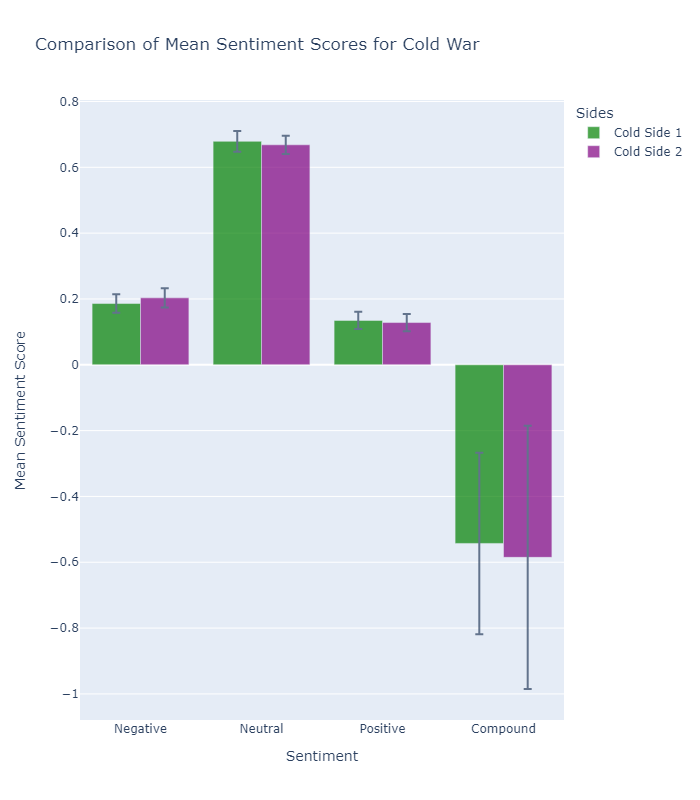

In [13]:
###COLD WAR###

labels = ['Negative', 'Neutral', 'Positive', 'Compound']
x = np.arange(len(labels))

# Confidence Interval Calculation for Cold War
ci_lower_3 = mean_scores_3 - ci_cold_side1['ci_lower'].values
ci_upper_3 = ci_cold_side1['ci_upper'].values - mean_scores_3

ci_lower_4 = mean_scores_4 - ci_cold_side2['ci_lower'].values
ci_upper_4 = ci_cold_side2['ci_upper'].values - mean_scores_4

# Create a bar chart with error bars for Cold War
fig3 = go.Figure()
fig3.add_trace(go.Bar(
    x=labels,
    y=mean_scores_3,
    name='Cold Side 1',
    error_y=dict(
        type='data',
        symmetric=False,
        array=ci_upper_3,
        arrayminus=ci_lower_3
    ),
    marker_color='green',
    opacity=0.7
))
fig3.add_trace(go.Bar(
    x=labels,
    y=mean_scores_4,
    name='Cold Side 2',
    error_y=dict(
        type='data',
        symmetric=False,
        array=ci_upper_4,
        arrayminus=ci_lower_4
    ),
    marker_color='purple',
    opacity=0.7
))


fig3.update_layout(
    title="Comparison of Mean Sentiment Scores for Cold War",
    xaxis_title="Sentiment",
    yaxis_title="Mean Sentiment Score",
    barmode='group',
    legend_title="Sides",
    height=800
)

# Visualisation 4 : Distribution of Compound Sentiment Scores for Cold War
fig4 = px.box(
    x=['Cold Side 1'] * len(sentiment_df_3['compound']) + ['Cold Side 2'] * len(sentiment_df_4['compound']),
    y=np.concatenate([sentiment_df_3['compound'], sentiment_df_4['compound']]),
    labels={"x": "Sides", "y": "Compound Sentiment Score"},
    color=['Cold Side 1'] * len(sentiment_df_3['compound']) + ['Cold Side 2'] * len(sentiment_df_4['compound']),
    title="Distribution of Compound Sentiment Scores for Cold War",
    boxmode="group"
)


fig4.update_traces(
    boxpoints="all",
    jitter=0.3,       
    pointpos=-1.8,    
    marker=dict(opacity=0.6)
)

fig4.update_layout(
    title="Distribution of Compound Sentiment Scores for Cold War",
    xaxis_title="Sides",
    yaxis_title="Compound Sentiment Score",
    height=800
)


fig3.write_html("comparison_mean_sentiment_cold_war.html")
fig3.write_image("comparison_mean_sentiment_cold_war.png")
Image("comparison_mean_sentiment_cold_war.png")


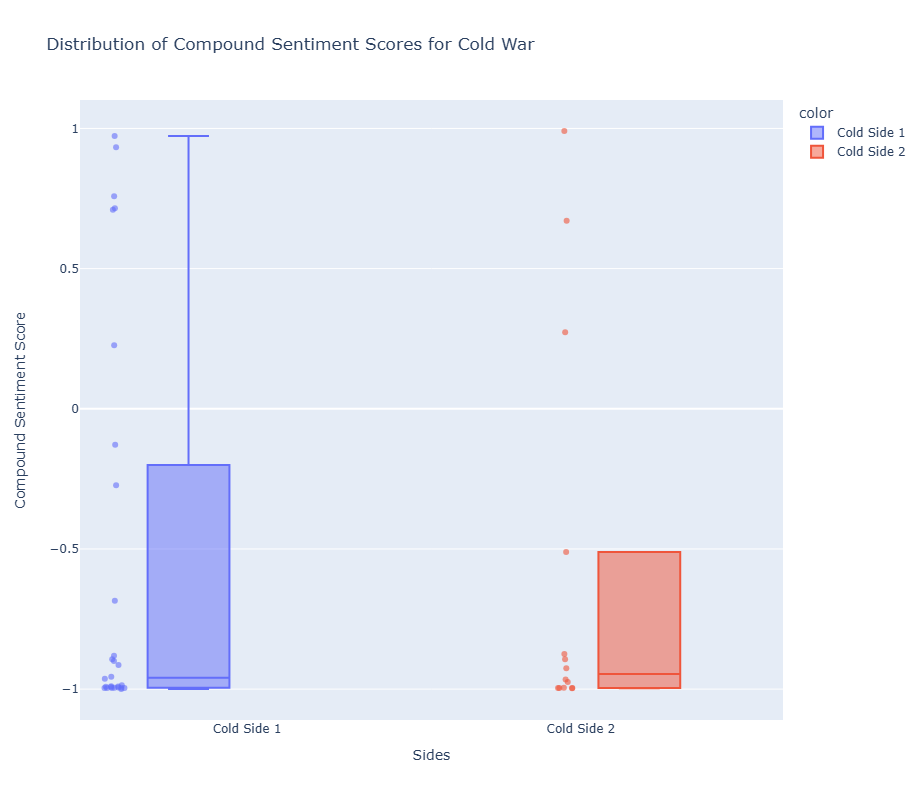

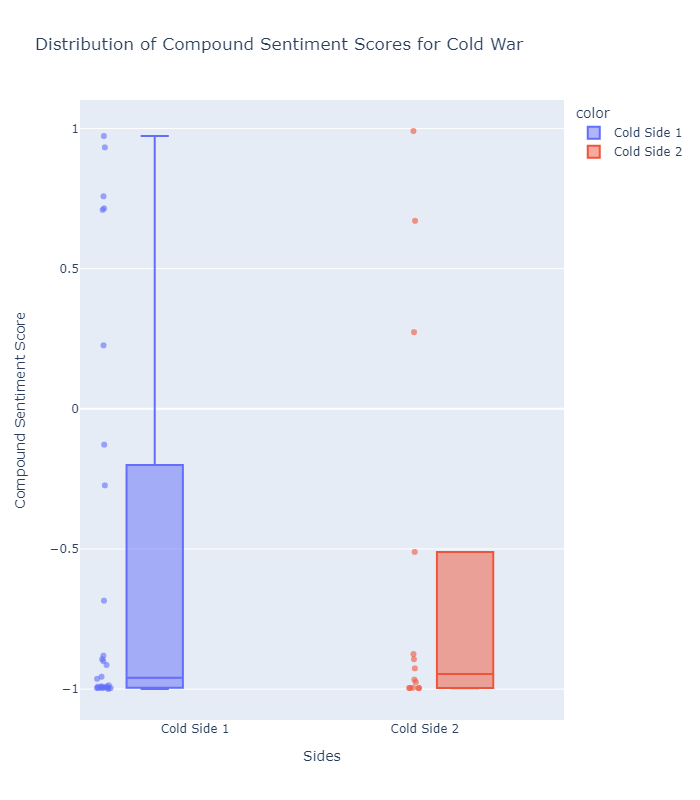

In [14]:
fig4.write_html("distribution_cold_war_sentiment.html")
fig4.write_image("distribution_cold_war_sentiment.png")
Image("distribution_cold_war_sentiment.png")

In [ ]:
# Perform t-tests for Side 1 and Side 2 for cold war
t_test_results = perform_t_tests(sentiment_df_3, sentiment_df_4)


print("\nT-Test Results:")
print(t_test_results)

In conclusion, the results for the Cold War are very similar. The slightly greater variability can be attributed to the smaller sample size.

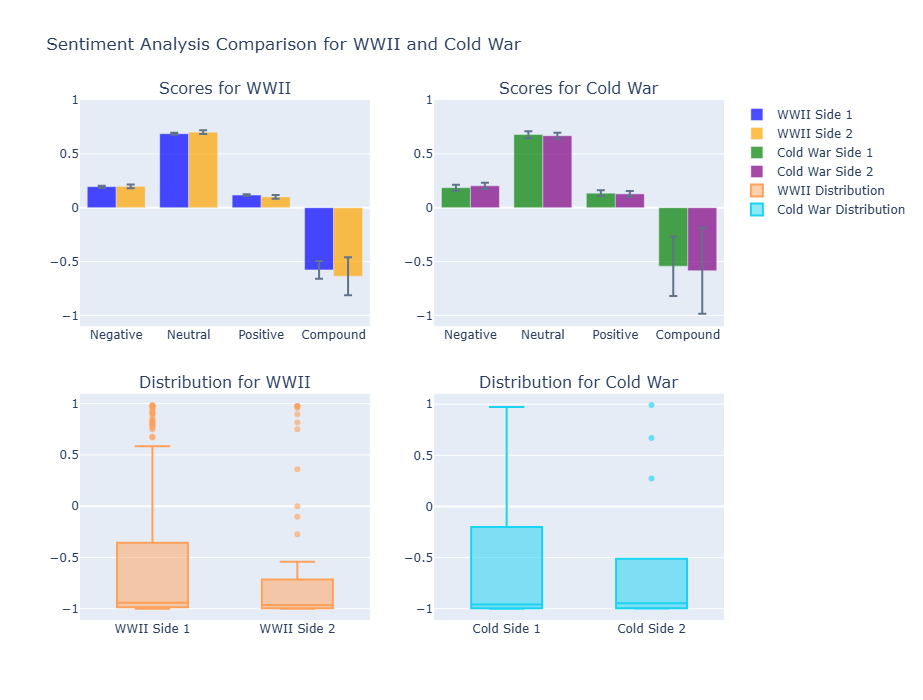

In [52]:


fig = create_global_sentiment_figure(
    mean_scores_1=mean_scores_1,
    mean_scores_2=mean_scores_2,
    mean_scores_3=mean_scores_3,
    mean_scores_4=mean_scores_4,
    ci_wwii_side1=ci_wwii_side1,
    ci_wwii_side2=ci_wwii_side2,
    ci_cold_side1=ci_cold_side1,
    ci_cold_side2=ci_cold_side2,
    sentiment_df_1=sentiment_df_1,
    sentiment_df_2=sentiment_df_2,
    sentiment_df_3=sentiment_df_3,
    sentiment_df_4=sentiment_df_4
)

fig.show()


In [ ]:
# Performing Named Entity Recognition
wars_iterator, war_names, side_iterator = named_entity_recognition(wars_df, wwii_movies_side1, wwii_movies_side2, cold_war_movies_side1, cold_war_movies_side2, lemmatizer, stop_words)

# Performing entity level sentiment analysis and plotting the corresponding heatmaps
entity_level_sent_analysis(wars_iterator, war_names, side_iterator)